In [3]:
import os
import numpy as np
import scipy as sp
import scipy.fftpack
import scipy.io.wavfile
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
from utils import *
%matplotlib inline
set_matplotlib_formats('png')
plt.rcParams['figure.figsize']=[10,5]

In [4]:
# CONFIGURATION
set_save_figures(True)
Fs_s=[11100,20000]
Fs_labels = [f'{str(int(fs/1000))}khz' for fs in Fs_s]

# Input Signal
The input signal in this case was created by filtering white noise sampled at `24 KHz` with one bandpass and one bandstop filter in order to give the noise a spectral 'shape'.  The effect of the TCOLA processing can be seen more easily for various parameters.

In [5]:
def print_signal(filename):
    orig_sig=np.fromfile(get_results_file_path(f'{filename}.dat'),dtype=np.single);
    plt.figure()
    plt.plot(orig_sig);
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    save_figure(f'{filename}_time')

def print_signal_spectrum(filename,fs):
    orig_sig=np.fromfile(get_results_file_path(f'{filename}.dat'),dtype=np.single);
    plt.figure()
    plt.magnitude_spectrum(orig_sig,Fs=fs);
    save_figure(f'{filename}_spectrum');
    
def plot_tc_noise_spectrum(filename,m,r=1):
    tc_dat_file=f'{filename}_tc_m={m}_r={r}.dat';
    dat_vals=np.fromfile(get_results_file_path(tc_dat_file),dtype=np.single);
    plt.title(f'Spectrum of Time Compressed Signal (M={m}, R={r})');
    plt.magnitude_spectrum(dat_vals,Fs=fs*m/r);

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


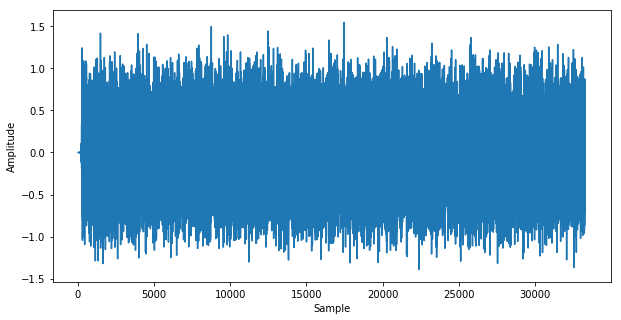

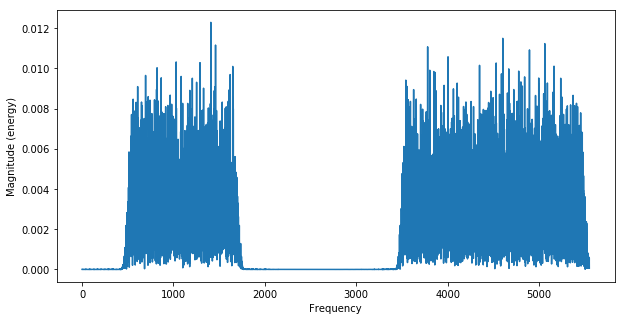

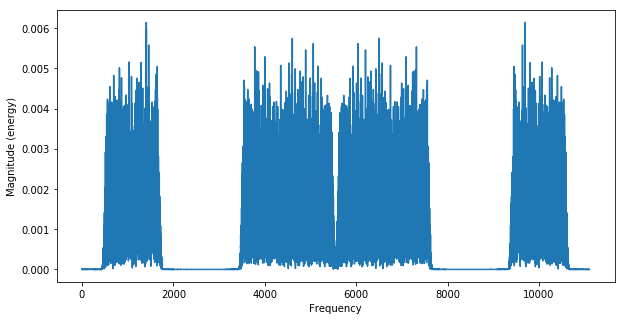

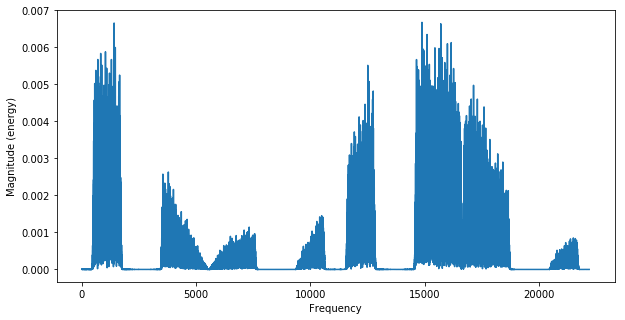

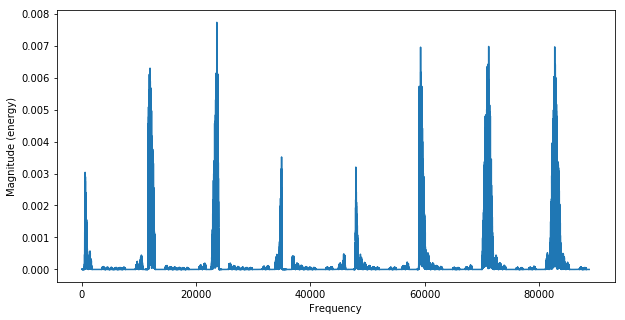

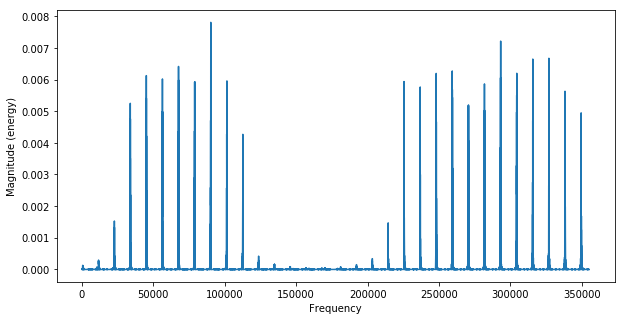

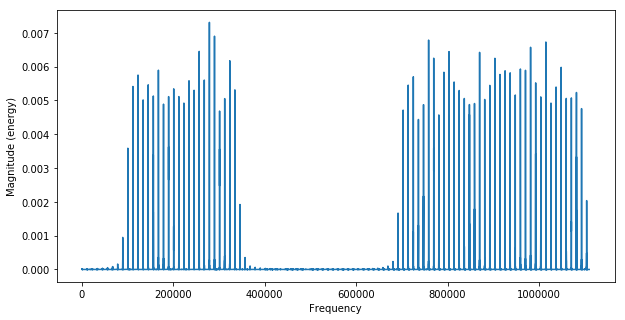

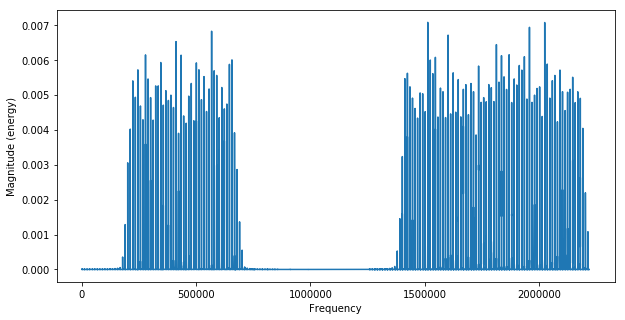

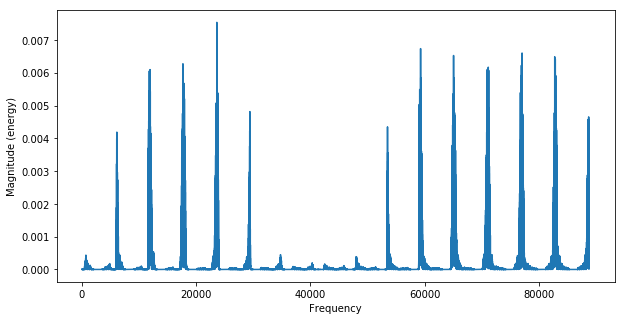

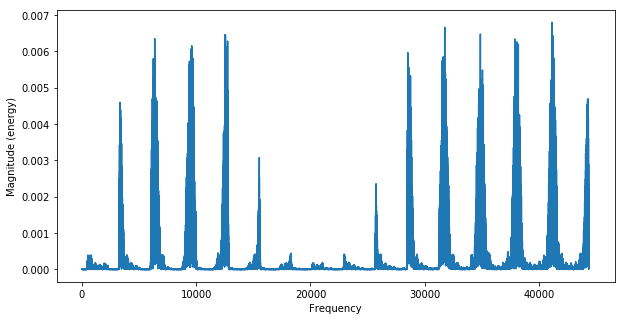

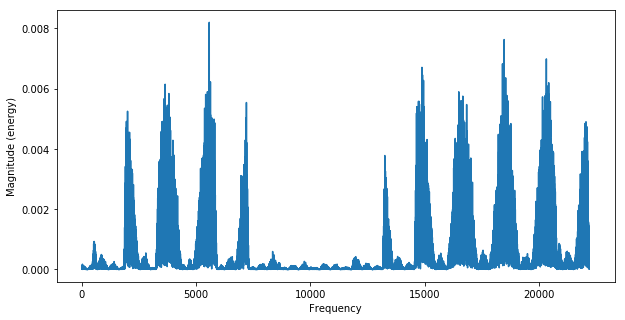

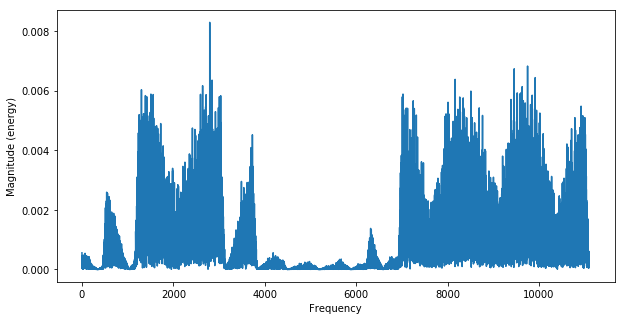

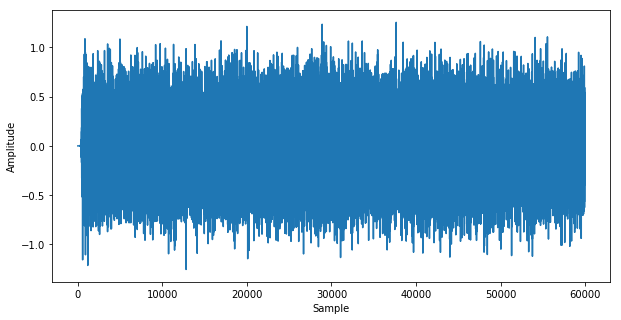

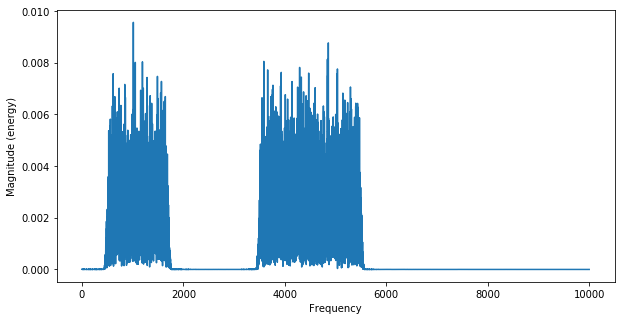

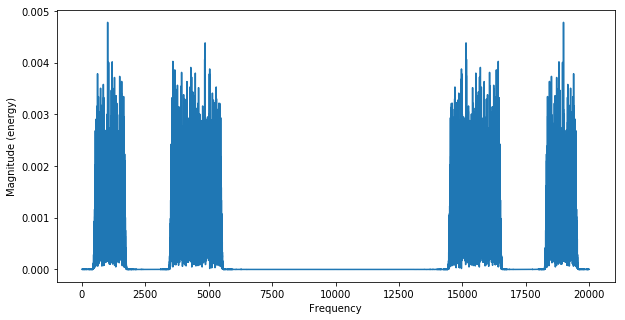

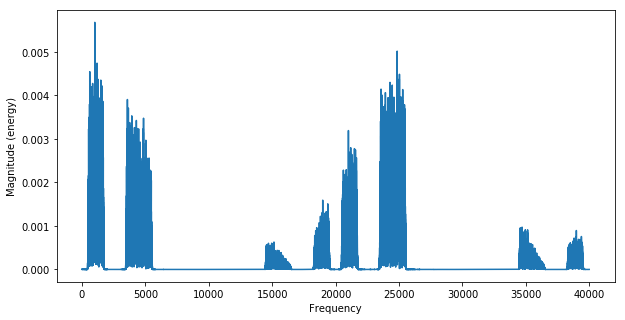

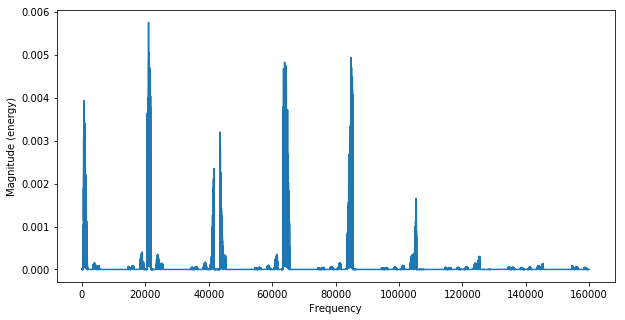

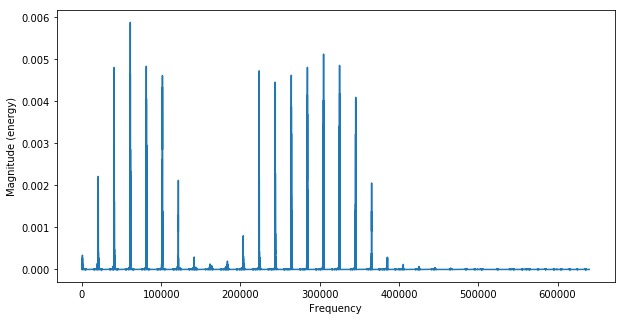

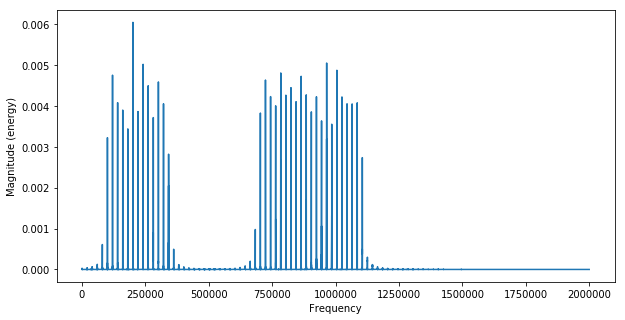

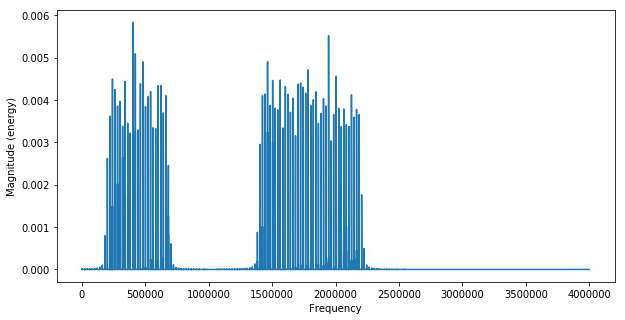

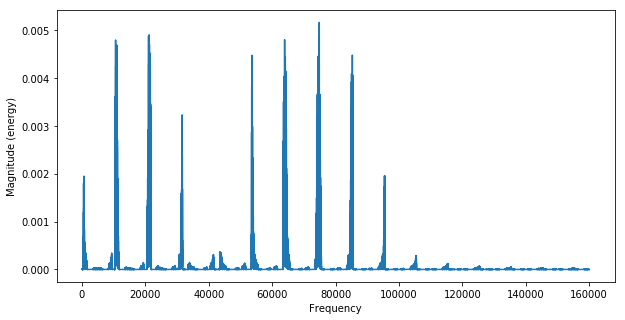

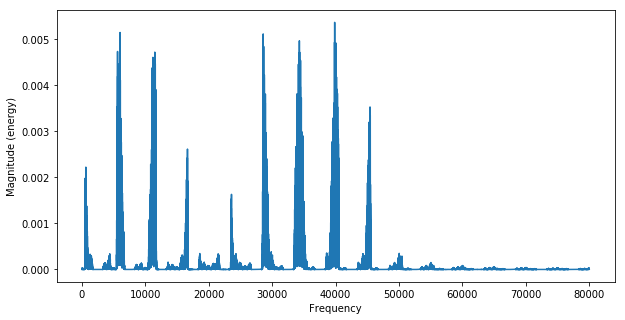

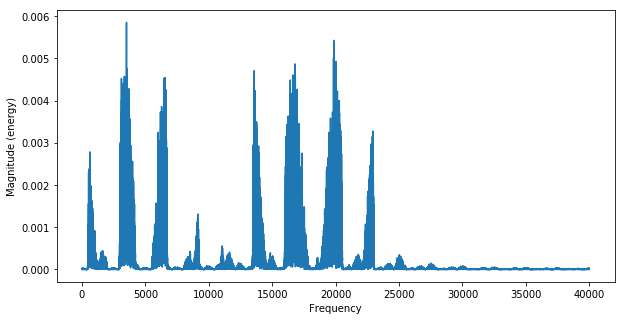

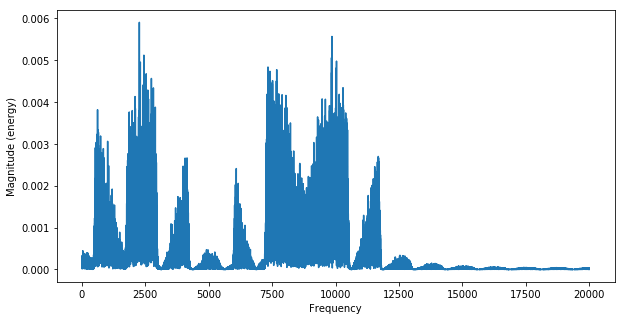

In [8]:
signal_name='shaped_noise'

m_values = [2,4,16,64,200,400]
r_values = [2,4,8,16]
r_m_value= 32

for i,fs in enumerate(Fs_s):
    fs_label=Fs_labels[i]
    base_sig_name=f'{signal_name}_{fs_label}'
    print_signal(base_sig_name)
    print_signal_spectrum(base_sig_name,fs)
    
    r=1
    for m in m_values:
        print_signal_spectrum(f'{base_sig_name}_tc_m={m}_r={r}',fs*m/r)
    
    for r in r_values:
        print_signal_spectrum(f'{base_sig_name}_tc_m={r_m_value}_r={r}',fs*r_m_value/r)

Would have saved figure:  /figures/tcola-noise-spectrum-varied-m.pdf


<Figure size 432x288 with 0 Axes>

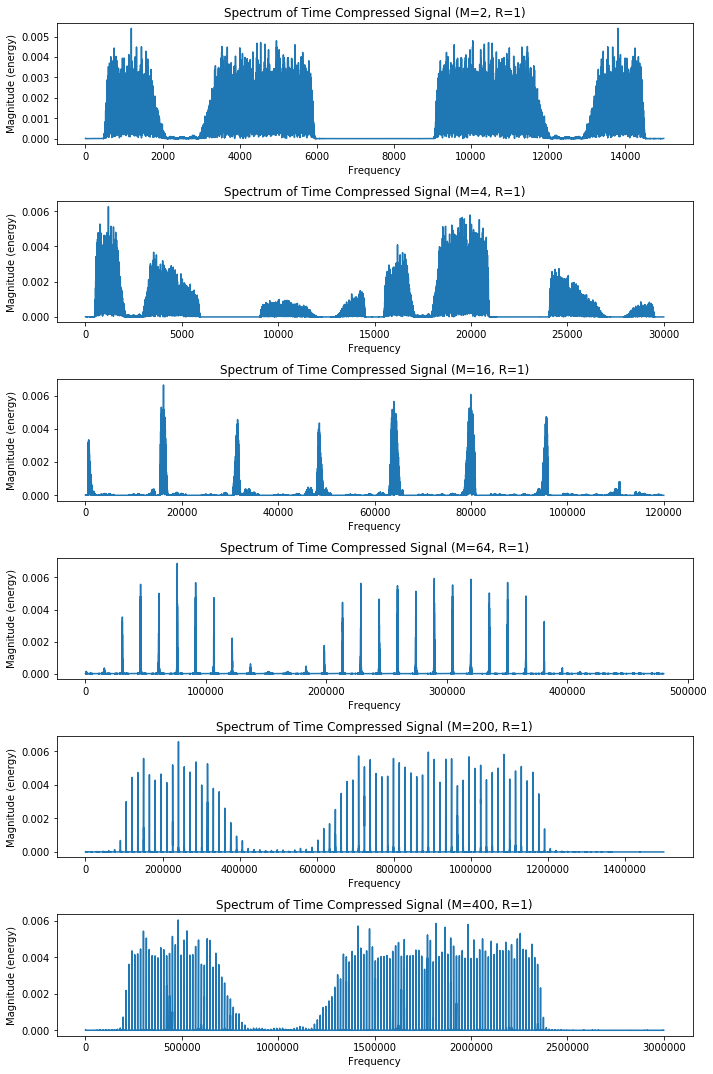

In [5]:
m_values = [2,4,16,64,200,400];
plt.clf()
plt.figure(figsize=(10.0,15.0))

i=1;
for m in m_values:
    plt.subplot(len(m_values),1,i)
    plot_noise_spectrum(m);
    i=i+1;
    
plt.tight_layout(1.0)
save_figure("tcola-noise-spectrum-varied-m");


<Figure size 432x288 with 0 Axes>

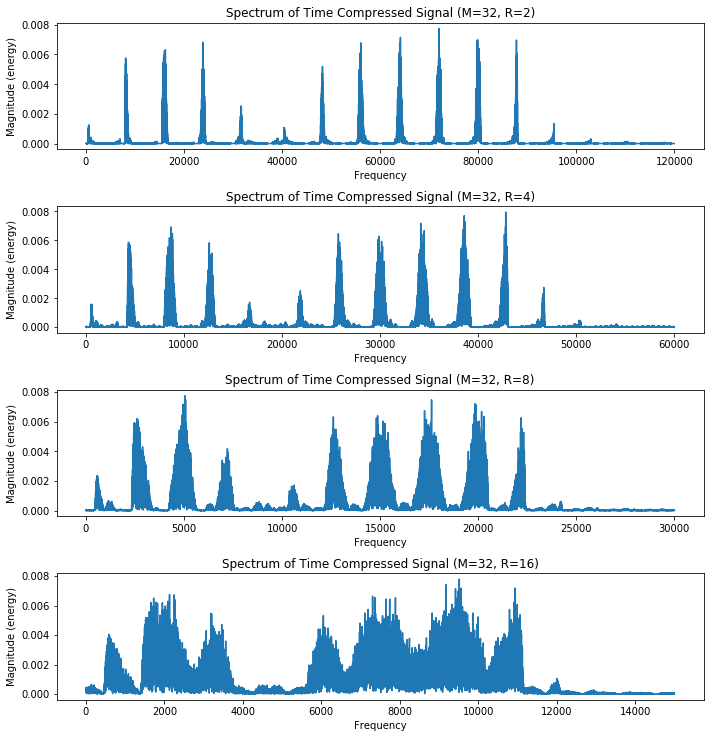

In [6]:
r_values = [2,4,8,16];
m = 32;
plt.clf()
plt.figure(figsize=(10.0,15.0))

i=1;
for r in r_values:
    plt.subplot(len(m_values),1,i)
    plot_noise_spectrum(m,r);
    i=i+1;
    
plt.tight_layout(1.0)
save_figure("tcola-noise-spectrum-varied-r");

Would have saved figure:  /figures/shaped_noise_20khz_time.pdf


<Figure size 720x360 with 0 Axes>

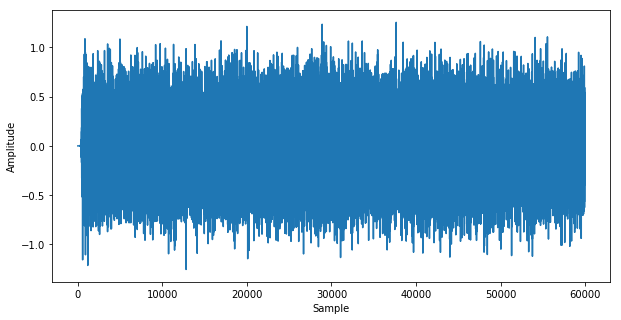

In [34]:
print_signal('shaped_noise_20khz')

Would have saved figure:  /figures/shaped_noise_20khz_spectrum.pdf


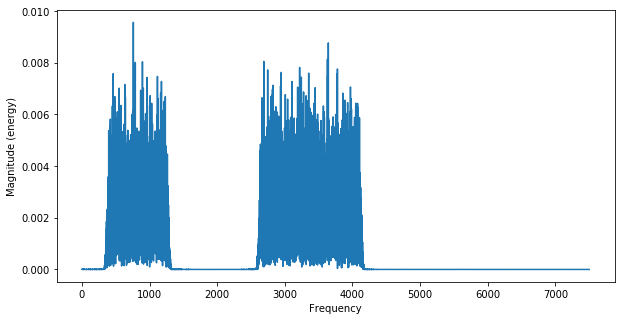

In [35]:
print_signal_spectrum('shaped_noise_20khz')